In [1]:
#Create Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


In [2]:
#Read in DataFrames

#GDP per Capita
gdp_per_capita_file = "Baseline_Indicator_Data/GDP_per_Capita/GDP_per_Capita_Data.csv"
gdp_per_capita_df = pd.read_csv(gdp_per_capita_file, skiprows = 4)

#GNI per Capita
gni_per_capita_file = "Baseline_Indicator_Data/GNI_per_Capita/GNI_per_Capita_Data.csv"
gni_per_capita_df = pd.read_csv(gni_per_capita_file, skiprows = 4)

#Life Expectancy
life_expectancy_file = "Baseline_Indicator_Data/Life_Expectancy/Life_Expectancy_Data.csv"
life_expectancy_df = pd.read_csv(life_expectancy_file, skiprows = 4)

#Infant Mortality
infant_mortality_file = "Baseline_Indicator_Data/Infant_Mortality/Infant_Mortality_Data.csv"
infant_mortality_df = pd.read_csv(infant_mortality_file, skiprows = 4)

#Exports
exports_file = "Baseline_Indicator_Data/Exports/Export_Data.csv"
exports_df = pd.read_csv(exports_file, skiprows = 4)

#Imports
imports_file = "Baseline_Indicator_Data/Imports/Import_Data.csv"
imports_df = pd.read_csv(imports_file, skiprows = 4)

In [3]:
#Add Suffixes to Columns Except Country Code
#Code found on https://stackoverflow.com/questions/34049618/how-to-add-a-suffix-or-prefix-to-each-column-name
#Add a Suffix to Differentiate Columns For Merge
gdp_per_capita_df = gdp_per_capita_df.add_suffix("_GDP_Cap")
#Drop Suffix from 'CountryCode' column to Allow Merge
gdp_per_capita_df = gdp_per_capita_df.rename(columns = {"CountryCode_GDP_Cap":"CountryCode"})

#Add a Suffix to Differentiate Columns For Merge
life_expectancy_df = life_expectancy_df.add_suffix("_Life")
#Drop Suffix from 'CountryCode' column to Allow Merge
life_expectancy_df = life_expectancy_df.rename(columns = {"CountryCode_Life":"CountryCode"})

#Add a Suffix to Differentiate Columns For Merge
infant_mortality_df = infant_mortality_df.add_suffix("_Mortality")
#Drop Suffix from 'CountryCode' column to Allow Merge
infant_mortality_df = infant_mortality_df.rename(columns = {"CountryCode_Mortality":"CountryCode"})

#Add a Suffix to Differentiate Columns For Merge
exports_df = exports_df.add_suffix("_Exports")
#Drop Suffix from 'CountryCode' column to Allow Merge
exports_df = exports_df.rename(columns = {"CountryCode_Exports":"CountryCode"})

#Add a Suffix to Differentiate Columns For Merge
imports_df = imports_df.add_suffix("_Imports")
#Drop Suffix from 'CountryCode' column to Allow Merge
imports_df = imports_df.rename(columns = {"CountryCode_Imports":"CountryCode"})

In [4]:
#Merge the DataFrames
#GDP per Capita & Life Expectancy
summary_df = pd.merge(gdp_per_capita_df, life_expectancy_df, how = "inner", on = "CountryCode")
summary_df.to_csv("World_Development_indicators.csv")
summary_df

,CountryName_GDP_Cap,CountryCode,IndicatorName_GDP_Cap,IndicatorCode_GDP_Cap,1960_GDP_Cap,1961_GDP_Cap,1962_GDP_Cap,1963_GDP_Cap,1964_GDP_Cap,1965_GDP_Cap,...,2010_Life,2011_Life,2012_Life,2013_Life,2014_Life,2015_Life,2016_Life,2017_Life,2018_Life,2019_Life
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,75.017,75.15800,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,61.028,61.55300,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,55.350,56.33000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,76.562,76.91400,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,NaN,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,69.900,70.14878,70.497561,70.797561,71.097561,71.346341,71.646341,71.946341,NaN,NaN
260,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,65.549,65.76800,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,NaN,NaN
261,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009816,454.962013,473.011615,511.497253,548.995942,584.704072,...,57.669,58.89500,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,NaN,NaN
262,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188867,220.042137,212.578123,213.896441,242.384333,303.281910,...,55.655,57.12600,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,NaN,NaN


In [5]:
#Merge the DataFrames
#Summary & Infant Mortality
summary_df = pd.merge(summary_df, infant_mortality_df, how = "inner", on = "CountryCode")
summary_df.to_csv("World_Development_indicators.csv")
summary_df

,CountryName_GDP_Cap,CountryCode,IndicatorName_GDP_Cap,IndicatorCode_GDP_Cap,1960_GDP_Cap,1961_GDP_Cap,1962_GDP_Cap,1963_GDP_Cap,1964_GDP_Cap,1965_GDP_Cap,...,2010_Mortality,2011_Mortality,2012_Mortality,2013_Mortality,2014_Mortality,2015_Mortality,2016_Mortality,2017_Mortality,2018_Mortality,2019_Mortality
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,64.3,61.9,59.5,57.3,55.1,53.1,51.2,49.5,47.9,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,71.5,67.3,63.6,60.5,57.8,55.5,53.4,51.6,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,11.9,11.0,10.2,9.5,8.9,8.5,8.2,8.0,7.8,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,3.7,3.6,3.4,3.2,3.1,3.0,2.8,2.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,43.6,43.0,42.9,42.9,42.9,42.9,42.9,42.9,42.9,NaN
261,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009816,454.962013,473.011615,511.497253,548.995942,584.704072,...,38.2,36.6,35.3,34.1,32.9,31.4,30.7,29.6,28.5,NaN
262,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188867,220.042137,212.578123,213.896441,242.384333,303.281910,...,52.8,51.2,49.6,47.8,45.9,44.5,43.1,41.5,40.4,NaN


In [6]:
#Merge the DataFrames
#Summary & Exports
summary_df = pd.merge(summary_df, exports_df, how = "inner", on = "CountryCode")
summary_df.to_csv("World_Development_indicators.csv")
summary_df

,CountryName_GDP_Cap,CountryCode,IndicatorName_GDP_Cap,IndicatorCode_GDP_Cap,1960_GDP_Cap,1961_GDP_Cap,1962_GDP_Cap,1963_GDP_Cap,1964_GDP_Cap,1965_GDP_Cap,...,2010_Exports,2011_Exports,2012_Exports,2013_Exports,2014_Exports,2015_Exports,2016_Exports,2017_Exports,2018_Exports,2019_Exports
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.459218e+09,1.729050e+09,1.653631e+09,1.770391e+09,1.850838e+09,1.873743e+09,1.848603e+09,1.912291e+09,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,2.945227e+09,3.900019e+09,3.793615e+09,4.028236e+09,3.233000e+09,2.326740e+09,1.148855e+09,1.192286e+09,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.157282e+10,6.782275e+10,7.163293e+10,6.937627e+10,6.512611e+10,3.457295e+10,2.844056e+10,3.542092e+10,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.337095e+09,3.769488e+09,3.565036e+09,3.694430e+09,3.732086e+09,3.104919e+09,3.437171e+09,4.110274e+09,4.785178e+09,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.162914e+09,1.581457e+09,1.511628e+09,1.550850e+09,1.662200e+09,1.412776e+09,1.591261e+09,1.926189e+09,2.098442e+09,NaN
260,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009816,454.962013,473.011615,511.497253,548.995942,584.704072,...,1.074070e+11,1.268450e+11,1.178050e+11,1.136120e+11,1.104250e+11,9.577176e+10,9.062881e+10,1.035650e+11,1.101440e+11,NaN
262,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188867,220.042137,212.578123,213.896441,242.384333,303.281910,...,7.503513e+09,9.494353e+09,1.022237e+10,1.135360e+10,1.054053e+10,7.889451e+09,7.402197e+09,9.093164e+09,9.999333e+09,NaN


In [7]:
#Merge the DataFrames
#Summary & Imports Mortality
summary_df = pd.merge(summary_df, imports_df, how = "inner", on = "CountryCode")
summary_df.to_csv("World_Development_indicators.csv")
summary_df

,CountryName_GDP_Cap,CountryCode,IndicatorName_GDP_Cap,IndicatorCode_GDP_Cap,1960_GDP_Cap,1961_GDP_Cap,1962_GDP_Cap,1963_GDP_Cap,1964_GDP_Cap,1965_GDP_Cap,...,2010_Imports,2011_Imports,2012_Imports,2013_Imports,2014_Imports,2015_Imports,2016_Imports,2017_Imports,2018_Imports,2019_Imports
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.854190e+09,2.136313e+09,2.089385e+09,2.130726e+09,2.113408e+09,2.035754e+09,1.975419e+09,2.031844e+09,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,9.950050e+09,1.190656e+10,1.252506e+10,1.133990e+10,1.053200e+10,8.647160e+09,8.079197e+09,9.153344e+09,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.568226e+10,4.394739e+10,4.591971e+10,4.930420e+10,5.047164e+10,3.849951e+10,2.552939e+10,2.839711e+10,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.792202e+09,6.700290e+09,5.860856e+09,5.999409e+09,6.243051e+09,5.071012e+09,5.436291e+09,6.070288e+09,6.856193e+09,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.235894e+09,3.881568e+09,3.503276e+09,3.512347e+09,3.783468e+09,3.245314e+09,3.418805e+09,3.796935e+09,4.412299e+09,NaN
260,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009816,454.962013,473.011615,511.497253,548.995942,584.704072,...,1.027470e+11,1.234750e+11,1.235600e+11,1.220460e+11,1.156790e+11,9.993671e+10,8.907688e+10,9.908540e+10,1.088780e+11,NaN
262,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188867,220.042137,212.578123,213.896441,242.384333,303.281910,...,6.256989e+09,8.385253e+09,9.950731e+09,1.237210e+10,1.119723e+10,9.076584e+09,8.095640e+09,8.741805e+09,1.021691e+10,NaN


The Rsquared value is 0.25.


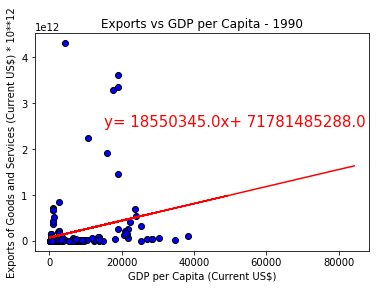

The Rsquared value is 0.14.


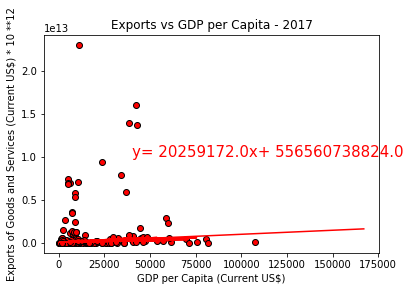

In [8]:
#Create a Scatter Plot of Exports vs GDP per Capita
#Drop Null Values
summary_df1 = summary_df.dropna(how = "any")

#1990
#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(summary_df['1990_GDP_Cap']) & ~np.isnan(summary_df['1990_Exports'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(summary_df['1990_GDP_Cap'][mask], summary_df['1990_Exports'][mask])
#Calculate the Regress Values
regress_1990 = slope * summary_df['1990_GDP_Cap'] + intercept
#Create the Line Equation
line_eq_1990 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(summary_df['1990_GDP_Cap'], summary_df['1990_Exports'], c = "blue", edgecolors = "black")
#Plot the Regress Values
plt.plot(summary_df['1990_GDP_Cap'], regress_1990, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_1990, xy = (15000, 2.5*10**12), fontsize = 15, color = "red")
#Create the Labels
plt.title("Exports vs GDP per Capita - 1990")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Exports of Goods and Services (Current US$) * 10**12")
#Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
#plt.savefig("Exports_vs_GDP_per_Capita_1990.png")
#Show the Plot
plt.show()


#2017
#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(summary_df['2017_GDP_Cap']) & ~np.isnan(summary_df['2017_Exports'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(summary_df['2017_GDP_Cap'][mask], summary_df['2017_Exports'][mask])
#Calculate the Regress Values
regress_2017 = slope * summary_df['2017_GDP_Cap'] + intercept
#Create the Line Equation
line_eq_2017 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(summary_df['2017_GDP_Cap'], summary_df['2017_Exports'], c = "red", edgecolors = "black")
#Plot the Regress Values
plt.plot(summary_df['2017_GDP_Cap'], regress_1990, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_2017, xy = (40000, 1.0*10**13), fontsize = 15, color = "red")
#Create the Labels
plt.title("Exports vs GDP per Capita - 2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Exports of Goods and Services (Current US$) * 10 **12")
#Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
#plt.savefig("Exports_vs_GDP_per_Capita_2017")
#Show the Plot
plt.show()

The Rsquared value is 0.25.


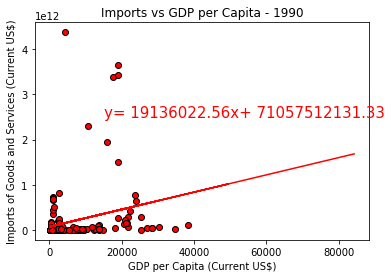

The Rsquared value is 0.14.


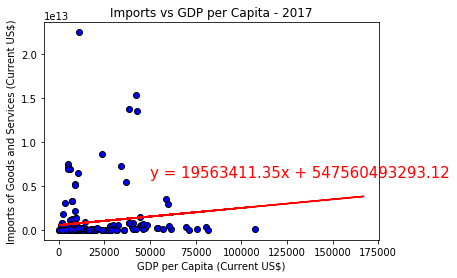

In [9]:
#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(summary_df['1990_GDP_Cap']) & ~np.isnan(summary_df['1990_Imports'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(summary_df['1990_GDP_Cap'][mask], summary_df['1990_Imports'][mask])

#(slope, intercept, rvalue, pvalue, stderr) = linregress(summary_df['1990_GDP_Cap'], summary_df['1990_Imports'])
regress_1990 = slope * summary_df['1990_GDP_Cap'] + intercept
#Create the Line Equation
line_eq_1990 = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))
#Plot the Export vs GDP per Capita Data
plt.scatter(summary_df['1990_GDP_Cap'], summary_df['1990_Imports'], c = "red", edgecolors = "black")
#Plot the Regress Values
plt.plot(summary_df['1990_GDP_Cap'], regress_1990, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_1990, xy = (15000, 2.5*10**12), fontsize = 15, color = "red")
plt.title("Imports vs GDP per Capita - 1990")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Imports of Goods and Services (Current US$)")
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("JA_Imports_vs_GDP_per_Capita_1990.png")
#Show the Plot
plt.show()

# Add the linear regression equation and line to plot
mask = ~np.isnan(summary_df['2017_GDP_Cap']) & ~np.isnan(summary_df['2017_Imports'])
x_values = summary_df['2017_GDP_Cap']
y_values = summary_df['2017_Imports']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values [mask], y_values[mask])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c = "blue", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy = (50000, 6*10**12), fontsize = 15, color = "red")
plt.title("Imports vs GDP per Capita - 2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Imports of Goods and Services (Current US$)")
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("JA_Imports_vs_GDP_per_Capita_2017.png")
#Show the Plot
plt.show()

In [10]:
#find countries with the lowest gdp 
summary_df[["CountryCode", "1980_GDP_Cap"]].sort_values(by="1980_GDP_Cap", ascending=True).fillna(0)
#find out if the import export is lower
#find out if the infant mortality and life expectany is lower as stated in theory


,CountryCode,1980_GDP_Cap
211,SOM,96.096128
245,UGA,100.030268
176,NPL,129.586074
85,GNB,141.559532
38,CHN,194.804722
...,...,...
254,VIR,0.000000
255,VNM,0.000000
258,WSM,0.000000
259,XKX,0.000000


In [11]:
# Check to see if there are any null values 
summary_df.isnull().sum()

CountryName_GDP_Cap        0
CountryCode                0
IndicatorName_GDP_Cap      0
IndicatorCode_GDP_Cap      0
1960_GDP_Cap             132
                        ... 
2015_Imports              31
2016_Imports              34
2017_Imports              39
2018_Imports              53
2019_Imports             264
Length: 316, dtype: int64

In [12]:
# test to see how many countries show with this condition
t = summary_df.loc[summary_df["1990_GDP_Cap"]>=200]
t

,CountryName_GDP_Cap,CountryCode,IndicatorName_GDP_Cap,IndicatorCode_GDP_Cap,1960_GDP_Cap,1961_GDP_Cap,1962_GDP_Cap,1963_GDP_Cap,1964_GDP_Cap,1965_GDP_Cap,...,2010_Imports,2011_Imports,2012_Imports,2013_Imports,2014_Imports,2015_Imports,2016_Imports,2017_Imports,2018_Imports,2019_Imports
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.854190e+09,2.136313e+09,2.089385e+09,2.130726e+09,2.113408e+09,2.035754e+09,1.975419e+09,2.031844e+09,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.568226e+10,4.394739e+10,4.591971e+10,4.930420e+10,5.047164e+10,3.849951e+10,2.552939e+10,2.839711e+10,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.792202e+09,6.700290e+09,5.860856e+09,5.999409e+09,6.243051e+09,5.071012e+09,5.436291e+09,6.070288e+09,6.856193e+09,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.015360e+11,9.117120e+11,1.029270e+12,1.113240e+12,1.173970e+12,1.095790e+12,1.021710e+12,1.076410e+12,1.106360e+12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Samoa,WSM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.459371e+08,3.959198e+08,4.367512e+08,3.976464e+08,4.215212e+08,3.914217e+08,3.918686e+08,3.907022e+08,3.922939e+08,NaN
260,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009816,454.962013,473.011615,511.497253,548.995942,584.704072,...,1.027470e+11,1.234750e+11,1.235600e+11,1.220460e+11,1.156790e+11,9.993671e+10,8.907688e+10,9.908540e+10,1.088780e+11,NaN
262,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188867,220.042137,212.578123,213.896441,242.384333,303.281910,...,6.256989e+09,8.385253e+09,9.950731e+09,1.237210e+10,1.119723e+10,9.076584e+09,8.095640e+09,8.741805e+09,1.021691e+10,NaN


In [13]:
# pull data for all countries that fall in this range and compare how life expactancy is affected
set_same_gdp = summary_df.loc[(summary_df["2017_GDP_Cap"]>=1000) & (summary_df["2017_GDP_Cap"] <=10000)]

#look at only these indicators 
same_gdp = set_same_gdp[["CountryCode", "2017_GDP_Cap", "2017_Imports","2017_Exports","2017_Mortality","2017_Life"]]
same_gdp
                         
clean_same_gdp = same_gdp.dropna()
clean_same_gdp.head(3)

,CountryCode,2017_GDP_Cap,2017_Imports,2017_Exports,2017_Mortality,2017_Life
2,AGO,4095.812942,2.839711e+10,3.542092e+10,53.4000,60.379000
3,ALB,4532.890162,6.070288e+09,4.110274e+09,8.0000,78.333000
5,ARB,6279.467425,1.076410e+12,1.133380e+12,27.0067,71.622526


The Rsquared value is 0.56.


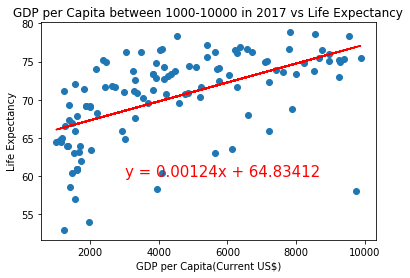

In [14]:
# make scatter plot showing relationship in GDP rage selected 
x_values = clean_same_gdp['2017_GDP_Cap']
y_values = clean_same_gdp['2017_Life']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy = (3000, 3*10*2), fontsize = 15, color = "red")
plt.title("GDP per Capita between 1000-10000 in 2017 vs Life Expectancy")
plt.xlabel("GDP per Capita(Current US$)")
plt.ylabel("Life Expectancy")
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("JA_Life_vs_Same_GDP_1k-10k_2017.png")
#Show the Plot
plt.show()

In [15]:
# pull data for all countries that fall in this range and compare how life expactancy is affected
set_same_gdp = summary_df.loc[(summary_df["2017_GDP_Cap"]>=15000) & (summary_df["2017_GDP_Cap"] <=30000)]

#look at only these indicators 
same_gdp = set_same_gdp[["CountryCode", "2017_GDP_Cap", "2017_Imports","2017_Exports","2017_Mortality","2017_Life"]]
same_gdp
                         
clean_same_gdp = same_gdp.dropna()
clean_same_gdp.head(3)

,CountryCode,2017_GDP_Cap,2017_Imports,2017_Exports,2017_Mortality,2017_Life
20,BHR,23715.48275,2.387633e+10,2.673218e+10,6.2,77.032
28,BRB,17431.60292,2.027176e+09,2.100298e+09,11.6,78.981
29,BRN,28572.14678,4.318031e+09,6.012295e+09,9.6,75.585


The Rsquared value is 0.38.


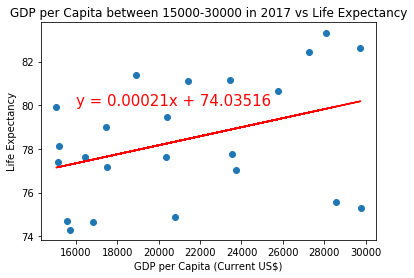

In [16]:
# make scatter plot showing relationship in GDP rage selected 
x_values = clean_same_gdp['2017_GDP_Cap']
y_values = clean_same_gdp['2017_Life']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy = (16000, 10*8), fontsize = 15, color = "red")
plt.title("GDP per Capita between 15000-30000 in 2017 vs Life Expectancy")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Life Expectancy")
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("JA_Life_vs_Same_GDP_15k-30k_2017.png")
#Show the Plot
plt.show()